# SDA - Bayes Basics

In [37]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### P(A|B) given: P(A), P(B|A), P(B|not A)

In [110]:
# the prior probability for a rare disease - izharofobia
p_a = 0.0002
not_a = 1 - p_a

# proposed new SOTA test for izharophibia
p_b_given_a = 0.8
p_b_given_not_a = 0.2

# the complete prob. for the new test
p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
print(f'P(Learning with Ayala) = {p_b * 100:.2f}%')

P(Learning with Ayala) = 20.01%


In [111]:
#Mr Bayes's formula
p_a_given_b = (p_b_given_a * p_a) / p_b
print(f'P(patient has izharophobia | Learning with Ayala) = {(p_a_given_b * 100):.2f}%')

P(patient has izharophobia | Learning with Ayala) = 0.08%


### AUC example

No test: ROC AUC=0.500
Random Forest: ROC AUC=0.847
L-SVM: ROC AUC=0.852
Logistic: ROC AUC=0.923


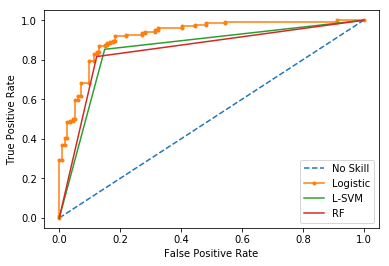

In [120]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 dataset, preprocess and fit model
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
func = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
func.fit(x_train, y_train)

# predict probabilities
ns_pred = [0 for _ in range(len(y_test))]
lr_pred = model.predict_proba(x_test)
lr_pred = lr_pred[:, 1]
svm_pred = classifier.predict(x_test)
rf_pred = func.predict(x_test)

# calculate scores
ns_auc = roc_auc_score(y_test, ns_pred)
lr_auc = roc_auc_score(y_test, lr_pred)
svm_auc = roc_auc_score(y_test, svm_pred)
rf_auc = roc_auc_score(y_test, rf_pred)

print('No test: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
print('L-SVM: ROC AUC=%.3f' % (svm_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred)


plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic-Reg')
plt.plot(svm_fpr, svm_tpr, label='L-SVM')
plt.plot(rf_fpr, rf_tpr, label='RF')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()